In [172]:
from skeletonization_workshop import closest_point_on_lines, thin_line, sort_points_in_segments, create_adjacency_matrix, connect_triplet_endpoints, connect_single_endpoints
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse.csgraph import connected_components
import random
from PIL import Image, ImageDraw, ImageFont
from matplotlib.colors import to_rgba, ListedColormap




In [173]:
random.seed(2)

div_time = 12000
lam3 = 0.1
path = f'master_thesis_animations/growth_wnt_alpha_bifurcation/isotropic_alpha_wnt_cells/div_time={div_time}_lam3={lam3}_2'
file_name = f'/sim_mes_div_time={div_time}_lam3={lam3}_2.npy'

def load_tree(path, scene=-1):
	data = np.load(path, allow_pickle=True)
	x, p = data[:2]
	if len(data) > 2:
		cell_type = data[3]
		tree_scene_x, tree_scene_p, tree_scene_cell_type = x[scene], p[scene], cell_type[scene]
		print(f'x1', len(tree_scene_x))
		mask = tree_scene_cell_type != 2
		x = tree_scene_x[mask]
		print('x2',len(x))
		p = tree_scene_p[mask]
	return x, p

x, p = load_tree(path+file_name, scene=2)


p = p / np.linalg.norm(p, axis=1)[:, None]



x1 2650
x2 2646


In [174]:
#threshold = 1.5
#number_of_points = len(x)
#indices = range(number_of_points)
#results, midpoints = closest_point_on_lines(x, p, threshold, indices)

## save midpoints
#np.save('skeleton_visualization_midpoints.npy', midpoints)

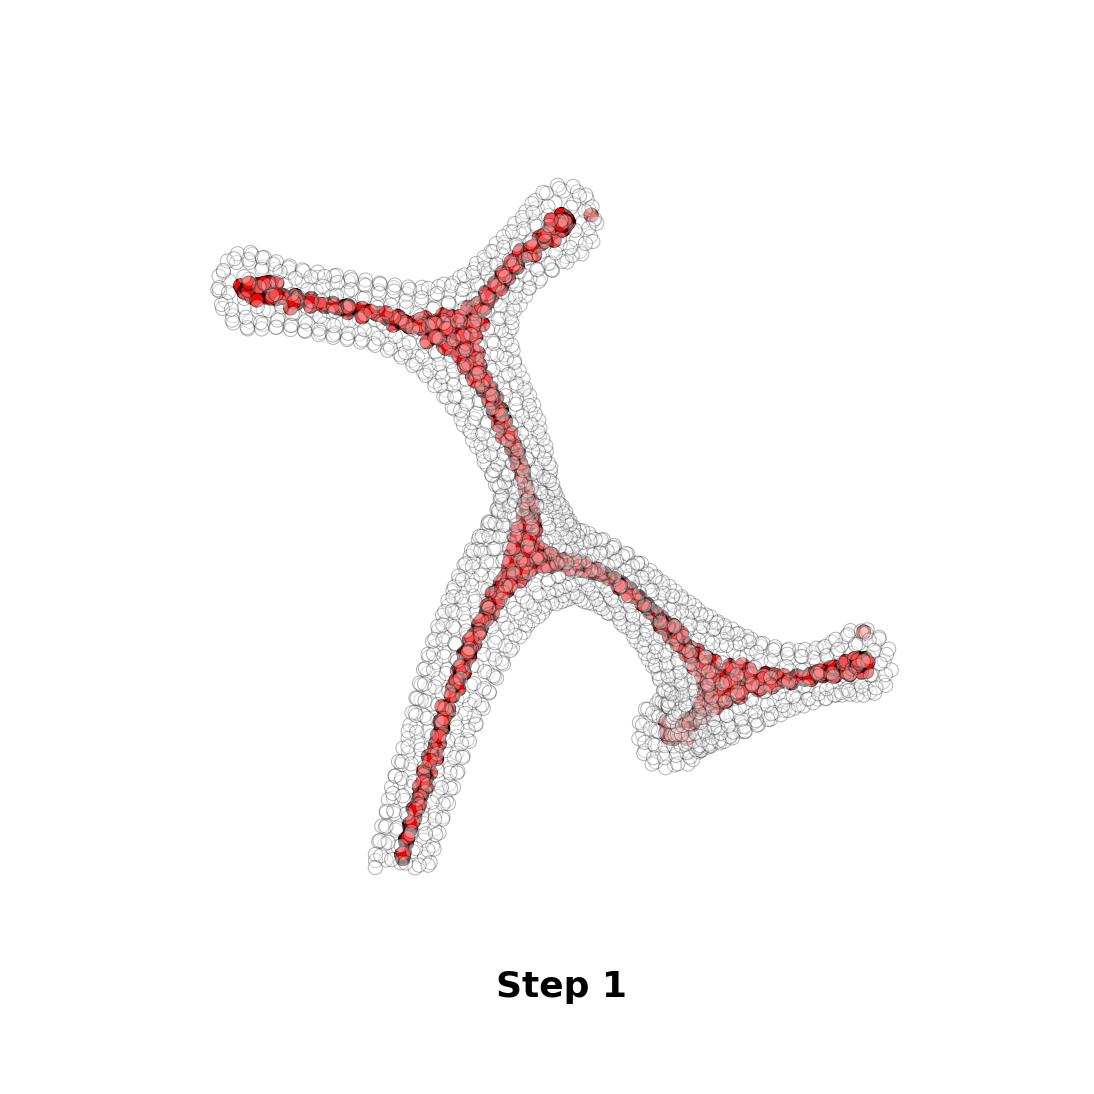

In [175]:
# open midpoints
midpoints = np.load('skeleton_visualization_midpoints.npy')

# Extract x, y, and z coordinates

mask_x = x[:,0]>10
x = x[mask_x]
p = p[mask_x]

mask_midpoints = midpoints[:,0]>10
midpoints = midpoints[mask_midpoints]

x_coords = x[:, 1]  # x-axis is now x[:, 1]
y_coords = x[:, 0]  # y-axis is now x[:, 0]
z_coords = x[:, 2]
sorted_indices = np.argsort(z_coords)  # Sort z_coords in ascending order
x_coords = x_coords[sorted_indices]
y_coords = y_coords[sorted_indices]
z_coords = z_coords[sorted_indices]
p = p[sorted_indices]

sorted_indices_midpoints = np.argsort(midpoints[:, 2])  # Sort z_coords in ascending order
midpoints = midpoints[sorted_indices_midpoints]

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, color='white', edgecolor='black', alpha=0.3, s=200)
ax.scatter( midpoints[:, 1], midpoints[:, 0], midpoints[:, 2], color='red', edgecolor='black', alpha=1, s=200)
# Tighten the axis limits around the data
ax.set_xlim(x_coords.min(), x_coords.max())
ax.set_ylim(y_coords.min(), y_coords.max())
ax.set_zlim(z_coords.min(), z_coords.max())

ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
ax.set_axis_off()
# reduce the white space in the plot by narrowing the bounding box
# Add text at the bottom
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
text_x = (x_lim[0] + x_lim[1]) / 2  # Middle of x-axis
text_y = y_lim[0] - 0.2 * (y_lim[1] - y_lim[0])  # Slightly below the y-axis limit
text_z = 0  # Bottom of z-axis limit


ax.text(
    text_x, text_y, text_z,  # Position in 3D space
    "Step 1",  # Annotation text
    color='black', fontsize=36, fontweight="bold", ha="center", va="bottom")

fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()
#fig.savefig("skeleton_step1.png", bbox_inches='tight', dpi=500)
plt.close(fig)



In [176]:
#thinned_points, regression_lines = thin_line(midpoints, point_cloud_thickness=5, iterations=2,sample_points=0)
#sorted_indices_thinned = np.argsort(thinned_points[:, 2])  # Sort z_coords in ascending order

##save thinned points
#np.save('skeleton_visualization_thinned_points.npy', thinned_points)
#np.save('skeleton_visualization_regression_lines.npy', regression_lines)

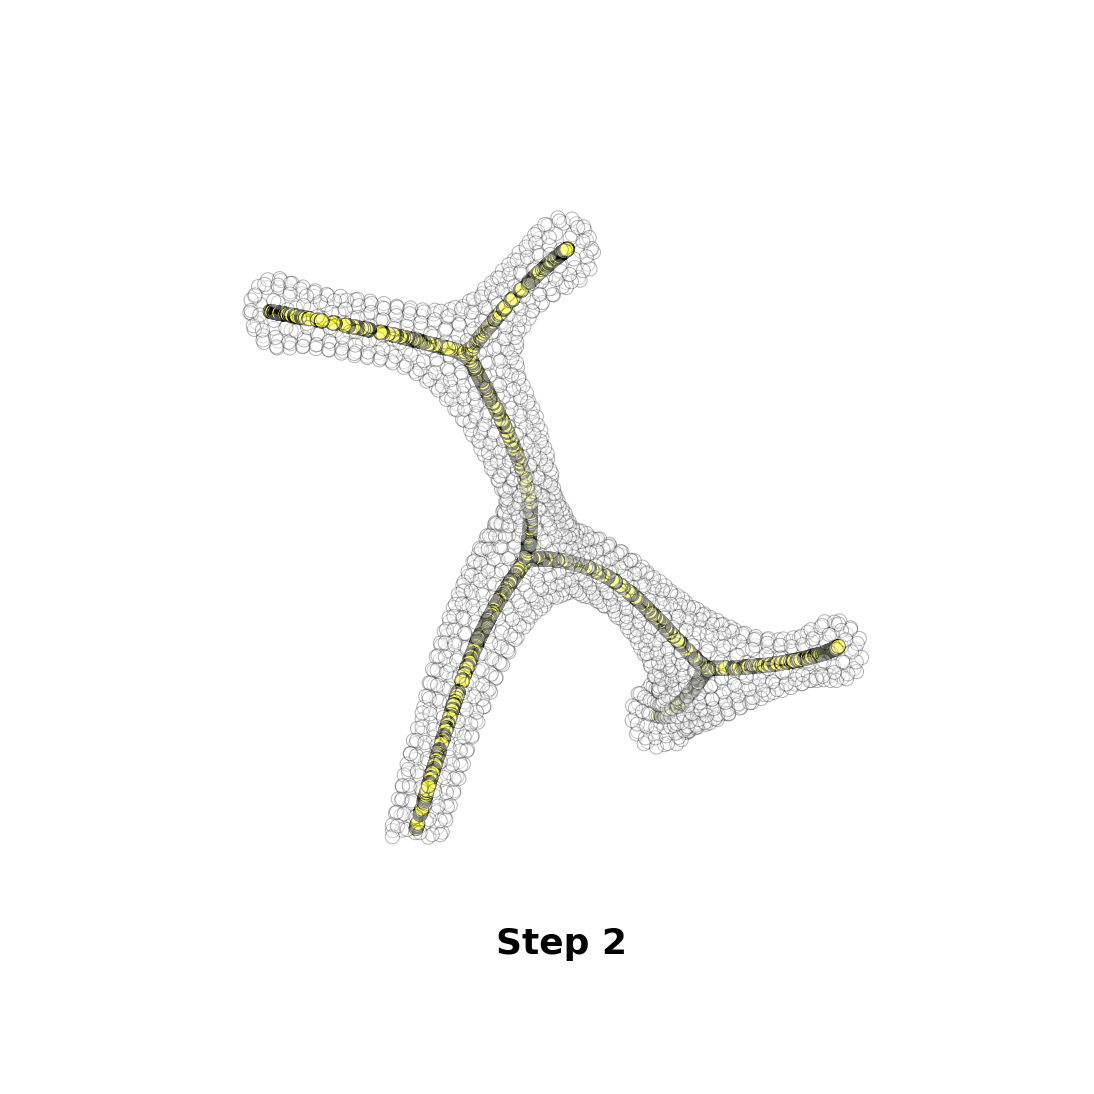

In [177]:
# open thinned points
thinned_points = np.load('skeleton_visualization_thinned_points.npy')
regression_lines = np.load('skeleton_visualization_regression_lines.npy')



fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, color='white', edgecolor='black', alpha=0.3, s=200)
thinned_points = thinned_points[sorted_indices_thinned]
ax.scatter(thinned_points[:, 1], thinned_points[:, 0], thinned_points[:, 2], color='yellow', edgecolor='black', alpha=1, s=200)


ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
ax.set_axis_off()
# reduce the white space in the plot by narrowing the bounding box
ax.text(
    text_x, text_y, text_z,  # Position in 3D space
    "Step 2",  # Annotation text
    color='black', fontsize=36, fontweight="bold", ha="center", va="bottom")

fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.show()
#fig.savefig("skeleton_step2.png", bbox_inches='tight', dpi=500)


In [178]:
#sorted_points_collected = sort_points_in_segments(thinned_points, regression_lines, sorted_points_distance=3)
#adjacency_matrix1, endpoints1, points1 = create_adjacency_matrix(sorted_points_collected)
#n_components, labels = connected_components(adjacency_matrix1, directed=False)
#print(f"Number of components: {n_components}")
##save adjacency matrix, endpoints and points
#np.save('skeleton_visualization_adjacency_matrix1.npy', adjacency_matrix1)
#np.save('skeleton_visualization_endpoints1.npy', endpoints1)
#np.save('skeleton_visualization_points1.npy', points1)


In [242]:
colors = ['mediumblue', 'g', 'purple', 'brown', 'pink', 'olive', 'cyan', 'black', 'grey']

<class 'list'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 7
 7 7 7 7 7 7 7]


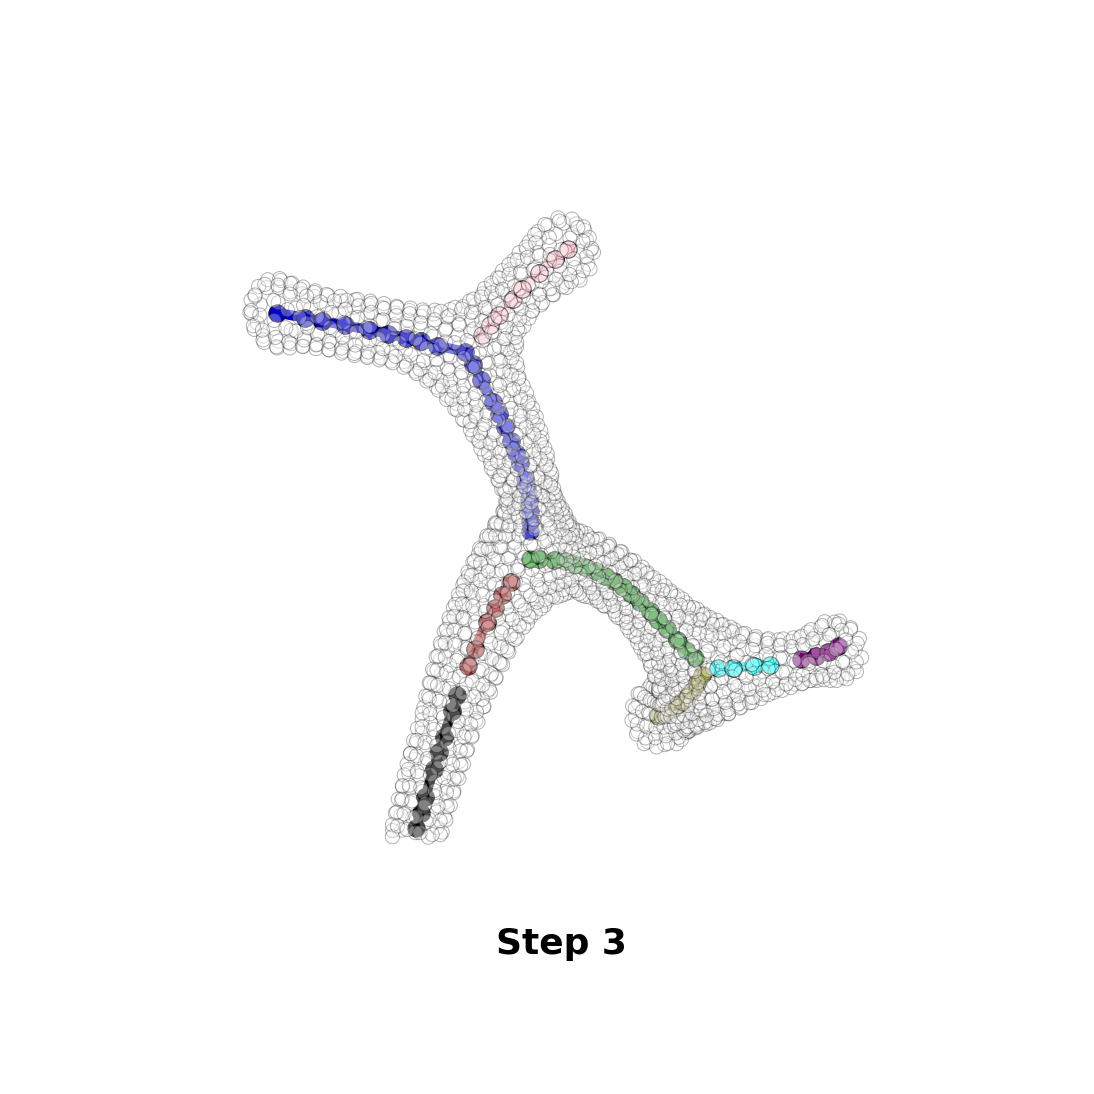

In [247]:
# open adjacency matrix, endpoints and points
adjacency_matrix1 = np.load('skeleton_visualization_adjacency_matrix1.npy')
endpoints1 = np.load('skeleton_visualization_endpoints1.npy')
# make endpoints1 a list
endpoints1 = list(endpoints1)
points1 = np.load('skeleton_visualization_points1.npy')
print(type(endpoints1))

# Create a 3D plot
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_coords, y_coords, z_coords, color='white', edgecolor='black', alpha=0.3, s=200)

# Compute connected components
n_components1, labels1 = connected_components(adjacency_matrix1, directed=False)
print(labels1)

# Plot connections and points
for i in range(adjacency_matrix1.shape[0]):
	for j in range(i + 1, adjacency_matrix1.shape[1]):
		if adjacency_matrix1[i, j] == 1:
			component_color = colors[labels1[i]]
			x_points1 = [points1[i, 1], points1[j, 1]]
			y_points1 = [points1[i, 0], points1[j, 0]]
			z_points1 = [points1[i, 2], points1[j, 2]]
			ax.plot(x_points1, y_points1, z_points1, color=component_color, linewidth=10)
			ax.scatter(points1[i, 1], points1[i, 0], points1[i, 2], color=component_color, edgecolor='black', s=300)
			ax.scatter(points1[j, 1], points1[j, 0], points1[j, 2], color=component_color, edgecolor='black', s=300)



ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
ax.set_axis_off()
ax.set_axis_off()
ax.text(
    text_x, text_y, text_z,  # Position in 3D space
    "Step 3",  # Annotation text
    color='black', fontsize=36, fontweight="bold", ha="center", va="bottom")


fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Show the plot
plt.show()
fig.savefig("skeleton_step3.png", bbox_inches='tight', dpi=500)


In [181]:
#adjacency_matrix2, endpoints2, points2, used_index2 = connect_triplet_endpoints(adjacency_matrix1, endpoints1, points1, radius=5)

##save adjacency matrix, endpoints and points and used index
#np.save('skeleton_visualization_adjacency_matrix2.npy', adjacency_matrix2)
#np.save('skeleton_visualization_endpoints2.npy', endpoints2)
#np.save('skeleton_visualization_points2.npy', points2)
#np.save('skeleton_visualization_used_index2.npy', used_index2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 3 3 3 3 3 3 3 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 7
 7 7 7 7 7 7 7 0 0]


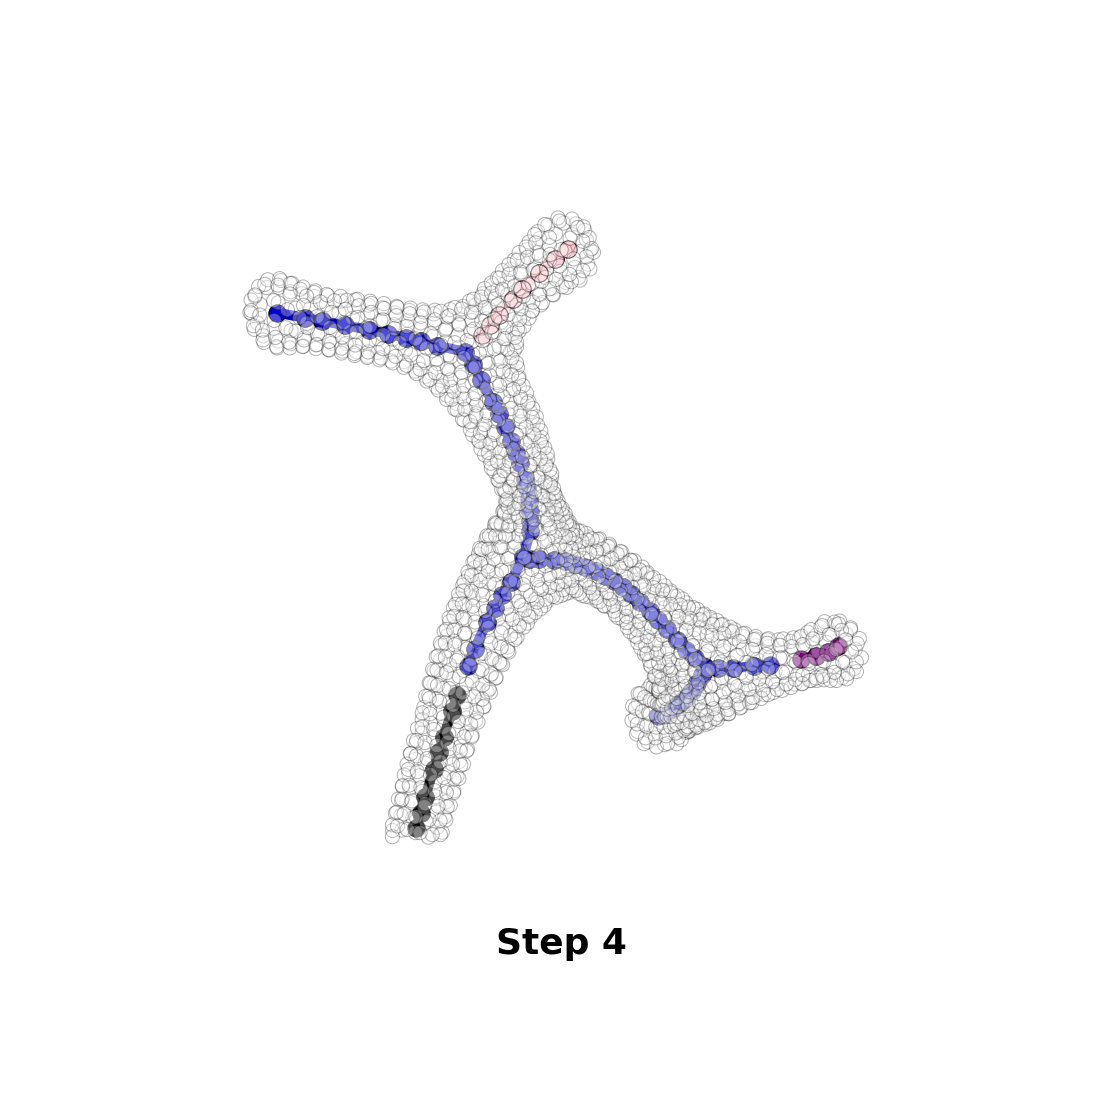

In [248]:
# open adjacency matrix, endpoints and points and used index
adjacency_matrix2 = np.load('skeleton_visualization_adjacency_matrix2.npy')
endpoints2 = np.load('skeleton_visualization_endpoints2.npy')
endpoints2 = list(endpoints2)
points2 = np.load('skeleton_visualization_points2.npy')
used_index2 = np.load('skeleton_visualization_used_index2.npy')
used_index2 = list(used_index2)
# Create a 3D plot
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
# Plot the points
ax.scatter(x_coords, y_coords, z_coords, color='white', edgecolor='black', alpha=0.3, s=200)

n_components2, labels2 = connected_components(adjacency_matrix2, directed=False)
print(labels2)
labels2[labels2 == 2] = 4
labels2[labels2 == 3] = 7
labels2[labels2 == 1] = 2

print(labels2)

# Plot connections and points
for i in range(adjacency_matrix2.shape[0]):
	for j in range(i + 1, adjacency_matrix2.shape[1]):
		if adjacency_matrix2[i, j] == 1:
			component_color = colors[labels2[i]]
			x_points2 = [points2[i, 1], points2[j, 1]]
			y_points2 = [points2[i, 0], points2[j, 0]]
			z_points2 = [points2[i, 2], points2[j, 2]]
			ax.plot(x_points2, y_points2, z_points2, color=component_color, linewidth=10)
			ax.scatter(points2[i, 1], points2[i, 0], points2[i, 2], color=component_color, edgecolor='black', s=300)
			ax.scatter(points2[j, 1], points2[j, 0], points2[j, 2], color=component_color, edgecolor='black', s=300)

ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
ax.set_axis_off()
ax.set_axis_off()

ax.text(
    text_x, text_y, text_z,  # Position in 3D space
    "Step 4",  # Annotation text
    color='black', fontsize=36, fontweight="bold", ha="center", va="bottom")


fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Show the plot
plt.show()
fig.savefig("skeleton_step4.png", bbox_inches='tight', dpi=500)


In [183]:
#adjacency_matrix3, endpoints3, points3, used_index3 = connect_single_endpoints(adjacency_matrix2, endpoints2, points2, used_index2)

##save adjacency matrix, endpoints and points and used index
#np.save('skeleton_visualization_adjacency_matrix3.npy', adjacency_matrix3)
#np.save('skeleton_visualization_endpoints3.npy', endpoints3)
#np.save('skeleton_visualization_points3.npy', points3)
#np.save('skeleton_visualization_used_index3.npy', used_index3)

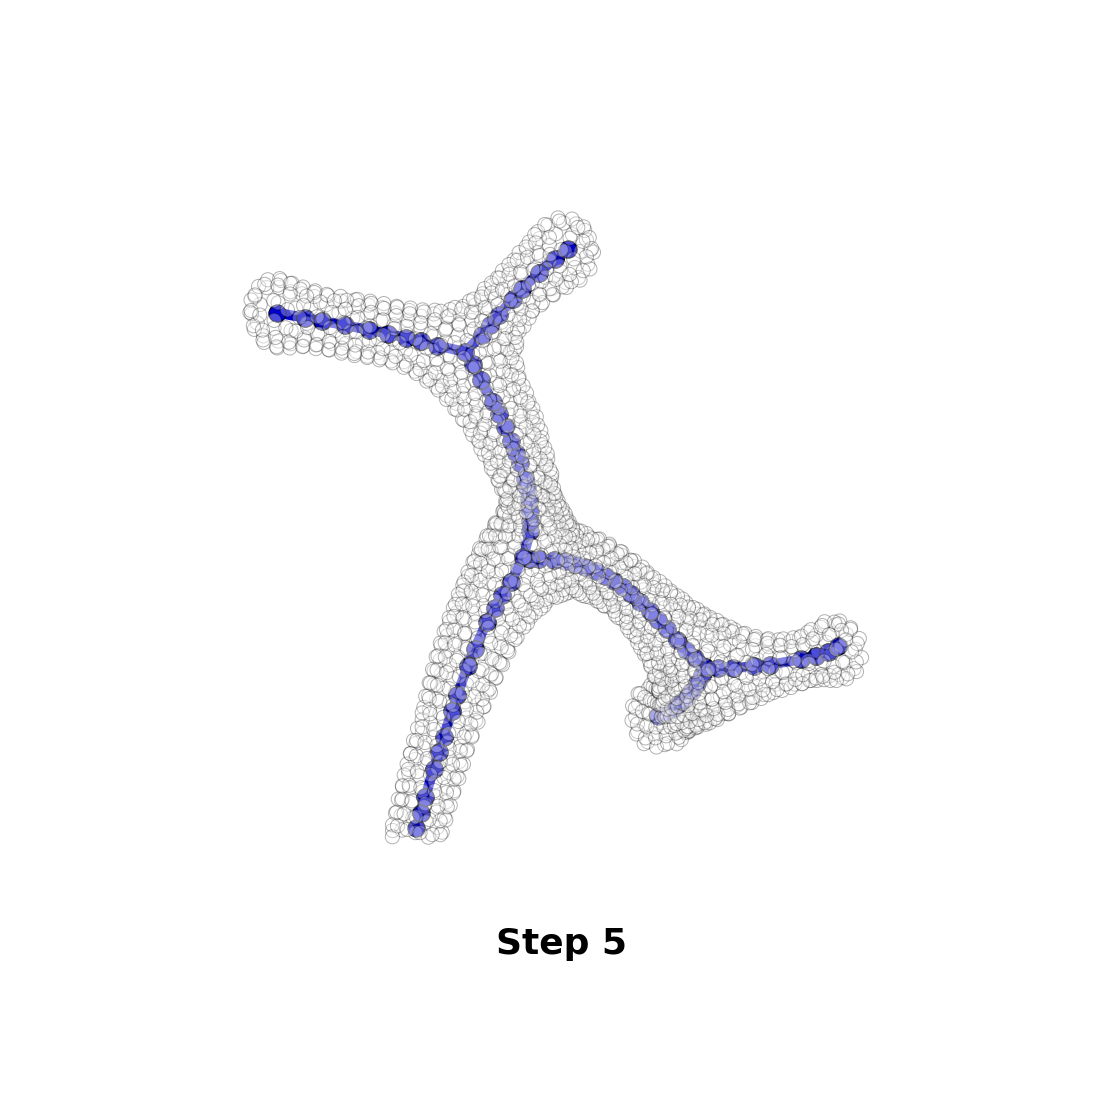

In [250]:
# open adjacency matrix, endpoints and points and used index
adjacency_matrix3 = np.load('skeleton_visualization_adjacency_matrix3.npy')
endpoints3 = np.load('skeleton_visualization_endpoints3.npy')
endpoints3 = list(endpoints3)
points3 = np.load('skeleton_visualization_points3.npy')
used_index3 = np.load('skeleton_visualization_used_index3.npy')
used_index3 = list(used_index3)





n_components3, labels3 = connected_components(adjacency_matrix3, directed=False)


# Create a 3D plot
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_coords, y_coords, z_coords, color='white', edgecolor='black', alpha=0.3, s=200)


# Draw the connections with different colors for each component
for i in range(adjacency_matrix3.shape[0]):
    for j in range(i + 1, adjacency_matrix3.shape[1]):  # Avoid duplicate lines
        if adjacency_matrix3[i, j] == 1:
            component_color3 = colors[labels3[i]]
            # Draw a line between points i and j
            x_points3 = [points3[i, 1], points3[j, 1]]
            y_points3 = [points3[i, 0], points3[j, 0]]
            z_points3 = [points3[i, 2], points3[j, 2]]
            ax.plot(x_points3, y_points3, z_points3, color=component_color3, linewidth=10)
            ax.scatter(points3[i, 1], points3[i, 0], points3[i, 2],  color=component_color3, edgecolor='black', alpha=1, s=300)
            ax.scatter(points3[j, 1], points3[j, 0], points3[j, 2],  color=component_color3, edgecolor='black', alpha=1, s=300)



ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
ax.set_axis_off()
ax.set_axis_off()

ax.text(
    text_x, text_y, text_z,  # Position in 3D space
    "Step 5",  # Annotation text
    color='black', fontsize=36, fontweight="bold", ha="center", va="bottom")


fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Show the plot
plt.show()
fig.savefig("skeleton_step5.png", bbox_inches='tight', dpi=500)


In [251]:
# Paths to your saved figures
figure_paths = [
    "skeleton_step1.png",  # Replace with your actual file paths
    "skeleton_step2.png",
    "skeleton_step3.png",
    "skeleton_step4.png",
    "skeleton_step5.png"
]

# Open the saved figures
figures = [Image.open(path) for path in figure_paths]

# Determine the size of each figure (assuming all are the same size)
single_width, single_height = figures[0].size

# Calculate the canvas dimensions
canvas_width = single_width * 2  # Two figures in each row
canvas_height = single_height * 3  # Two rows + one figure in the center below

# Create a white canvas
canvas = Image.new("RGB", (canvas_width, canvas_height), "white")

# Paste the first row of figures
canvas.paste(figures[0], (0, 0))  # Top-left
canvas.paste(figures[1], (single_width, 0))  # Top-right

# Paste the second row of figures
canvas.paste(figures[2], (0, single_height))  # Bottom-left
canvas.paste(figures[3], (single_width, single_height))  # Bottom-right

# Paste the fifth figure in the center below
center_x = (canvas_width - single_width) // 2
canvas.paste(figures[4], (center_x, single_height * 2))  # Centered below

draw = ImageDraw.Draw(canvas)
title_text = "Skeletonization Algorithm"  # Title text
font_size = 700
try:
    # Use a truetype font for better rendering
    font = ImageFont.truetype("arial.ttf", font_size)
except IOError:
    # Fall back to default PIL font if arial is unavailable
    font = ImageFont.load_default()
# Save or display the combined figure

text_width, text_height = draw.textsize(title_text, font=font)
title_x = (canvas_width - text_width) // 2
title_y = (1000 - text_height) // 2
draw.text((title_x, title_y), title_text, fill="black", font=font, fontweight="bold")
canvas.save("combined_figure_skeleton_custom_layout.png")
canvas.show()

In [186]:
from angle_measurer_from_graph import length_measurer, generation_number_generator
from collections import deque

def generation_number_generator(adjacency_matrix, point_array, x, p):
	# Stem initialization
	stem_indices = [np.argmin(y_coords)]  # Add more stem indices if needed
	stem_points = set()

	# Identify closest points in point_array for each stem index
	for idx in stem_indices:
		stem_points.add(np.argmin(np.linalg.norm(point_array - (x[idx] - p[idx]), axis=1)))

	# Initialize generation numbers and visited set
	num_points = point_array.shape[0]
	generation_numbers = [-1] * num_points  # -1 means unvisited
	visited = set()

	# Initialize BFS for each stem point
	queues = {point: deque([(point, 1)]) for point in stem_points}
	for point in stem_points:
		generation_numbers[point] = 1
		visited.add(point)

	# Set to track bifurcation points
	bifurcation_points = set()

	# Label all stem points as generation 0
	while any(queues.values()):  # While at least one queue is not empty
		for point, queue in list(queues.items()):
			if not queue:
				continue

			current_point, current_generation = queue.popleft()
			neighbors = np.where(adjacency_matrix[current_point] == 1)[0]

			for neighbor in neighbors:
				if neighbor in visited:
					continue

				visited.add(neighbor)

				# Check if the neighbor is a bifurcation point
				neighbor_connections = np.where(adjacency_matrix[neighbor] == 1)[0]
				if len(neighbor_connections) >= 3:
					bifurcation_points.add(neighbor)
				else:
					generation_numbers[neighbor] = 1
					queue.append((neighbor, current_generation))

			# Stop propagating once this path has reached a bifurcation
			if neighbor in bifurcation_points:
				queue.clear()

	# Continue labeling beyond bifurcation points
	queue = deque([(bif_point, 2) for bif_point in bifurcation_points])
	for bif_point in bifurcation_points:
		generation_numbers[bif_point] = 2
		visited.add(bif_point)

	while queue:
		current_point, current_generation = queue.popleft()
		neighbors = np.where(adjacency_matrix[current_point] == 1)[0]

		for neighbor in neighbors:
			if neighbor in visited:
				continue

			visited.add(neighbor)

			# Check if the neighbor is a bifurcation point
			neighbor_connections = np.where(adjacency_matrix[neighbor] == 1)[0]
			if len(neighbor_connections) >= 3:
				next_generation = current_generation + 1
			else:
				next_generation = current_generation

			generation_numbers[neighbor] = next_generation
			queue.append((neighbor, next_generation))

	return np.array(generation_numbers)

structure_x = np.array([x_coords, y_coords, z_coords]).T

generation_numbers = generation_number_generator(adjacency_matrix3, points3, structure_x, p)


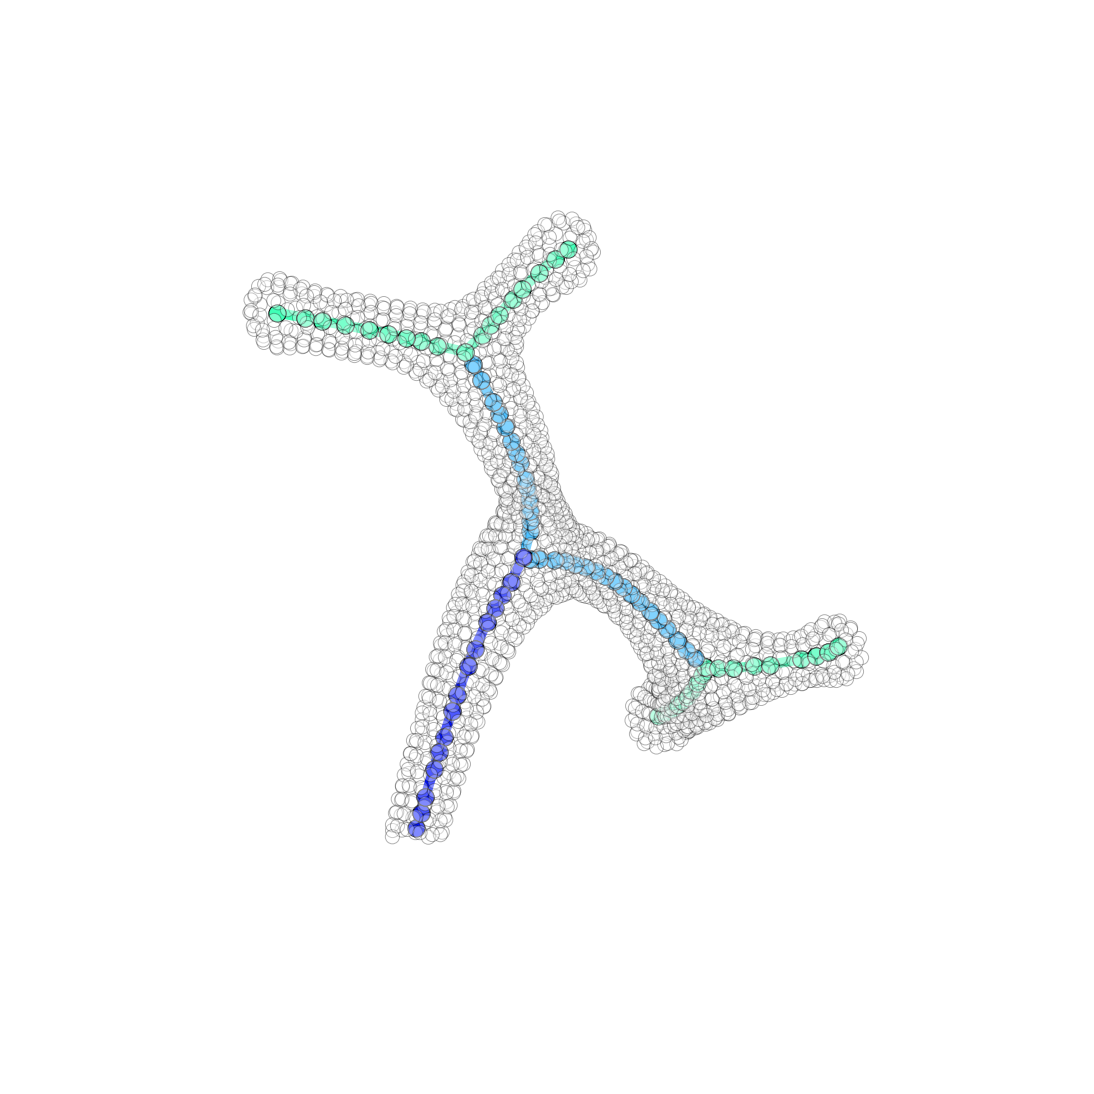

In [188]:
# Create a 3D plot
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x_coords, y_coords, z_coords, color='white', edgecolor='black', alpha=0.3, s=200)


# Draw the connections with different colors for each component
for i in range(adjacency_matrix3.shape[0]):
    for j in range(i + 1, adjacency_matrix3.shape[1]):  # Avoid duplicate lines
        if adjacency_matrix3[i, j] == 1:
            component_color3 = colors[generation_numbers[i]]
            # Draw a line between points i and j
            x_points3 = [points3[i, 1], points3[j, 1]]
            y_points3 = [points3[i, 0], points3[j, 0]]
            z_points3 = [points3[i, 2], points3[j, 2]]
            ax.plot(x_points3, y_points3, z_points3, color=component_color3, linewidth=10)
            ax.scatter(points3[i, 1], points3[i, 0], points3[i, 2],  color=component_color3, edgecolor='black', alpha=1, s=300)
            ax.scatter(points3[j, 1], points3[j, 0], points3[j, 2],  color=component_color3, edgecolor='black', alpha=1, s=300)
    
ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
ax.set_axis_off()
ax.set_axis_off()


fig.subplots_adjust(left=0, right=1, top=1, bottom=0)



In [189]:
segment_lengths, global_angles, global_dihedral_angles, global_vectors, global_dihedral_normals, local_angles, local_dihedral_angles, local_vectors, local_dihedral_normals = length_measurer(adjacency_matrix3, points3, generation_numbers)

3 [3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 2 3]
[[0.         0.         0.5        1.        ]
 [0.         0.06470588 1.         1.        ]
 [0.         0.64509804 1.         1.        ]
 [0.24984187 1.         0.71790006 1.        ]
 [0.71790006 1.         0.24984187 1.        ]
 [1.         0.72694263 0.         1.        ]
 [1.         0.18954248 0.         1.        ]
 [0.5        0.         0.         1.        ]]


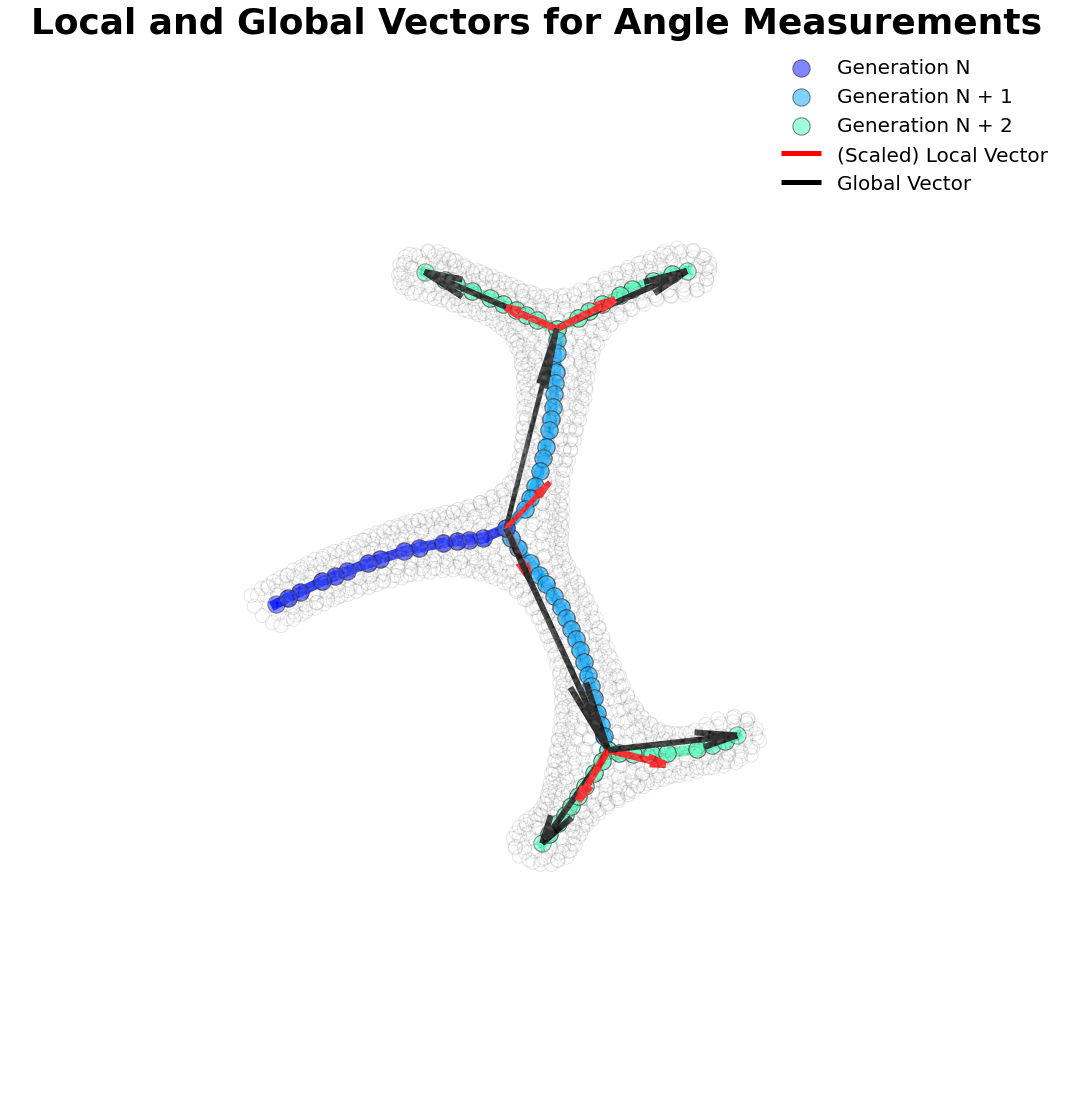

In [259]:

fig = plt.figure(figsize=(20, 15))
added_labels = set()
print(len(np.unique(generation_numbers)), generation_numbers)
gen_colors = plt.cm.jet(np.linspace(0, 1, 8))
print(gen_colors)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, color='white', edgecolor='black', alpha=0.1, s=200)
# Draw the connections with different colors for each component
for i in range(adjacency_matrix3.shape[0]):
	for j in range(i + 1, adjacency_matrix3.shape[1]):  # Avoid duplicate lines
		if adjacency_matrix3[i, j] == 1:
			component_color3 = gen_colors[generation_numbers[i]]
			
			# Draw a line between points i and j
			x_points3 = [points3[i, 1], points3[j, 1]]
			y_points3 = [points3[i, 0], points3[j, 0]]
			z_points3 = [points3[i, 2], points3[j, 2]]
			ax.plot(
				x_points3, y_points3, z_points3,
				color=component_color3, linewidth=10
			)
			
			# Add scatter point for point i with a label only if not already added
			label = f'Generation N + {generation_numbers[i]-1}'
			if generation_numbers[i] == 1:
				label = 'Generation N'
			if label not in added_labels:
				ax.scatter(
					points3[i, 1], points3[i, 0], points3[i, 2],
					color=component_color3, edgecolor='black',
					alpha=0.5, s=300, label=label
				)
				added_labels.add(label)  # Mark this label as added
			else:
				ax.scatter(
					points3[i, 1], points3[i, 0], points3[i, 2],
					color=component_color3, edgecolor='black',
					alpha=0.5, s=300
				)
			
			# Scatter point for point j without a label
			ax.scatter(
				points3[j, 1], points3[j, 0], points3[j, 2],
				color=component_color3, edgecolor='black',
				alpha=0.5, s=300
			)
vector_scale = 4


for key, value in global_vectors.items():
	for vector in value:
		label = 'Global Vector'
		if label not in added_labels:
			ax.quiver(
				points3[key][1], points3[key][0], points3[key][2],
				vector[1], vector[0], vector[2],
				length=1, colors='black', edgecolor='black',
				label=label, linewidth=5, zorder=1
			)
			added_labels.add(label)  # Mark this label as added
		else:
			ax.quiver(
				points3[key][1], points3[key][0], points3[key][2],
				vector[1], vector[0], vector[2],
				length=1, colors='black', edgecolor='black', linewidth=6, zorder=1)

for key, value in local_vectors.items():
	for vector in value:
		vector = vector / np.linalg.norm(vector)

		label = '(Scaled) Local Vector'
		if label not in added_labels:
			ax.quiver(
				points3[key][1], points3[key][0], points3[key][2],
				vector[1], vector[0], vector[2],
				length=10, colors='red', edgecolor='red',
				label=label, linewidth=5, zorder=2)
			added_labels.add(label)  # Mark this label as added
		else:
			ax.quiver(
				points3[key][1], points3[key][0], points3[key][2],
				vector[1], vector[0], vector[2],
				length=10, colors='red', edgecolor='red', linewidth=7, zorder=2)



#for key, value in global_dihedral_normals.items():
#	for vector in value:
#		vector = vector / np.linalg.norm(vector)
#		vector = vector_scale * vector
#		label = 'Normal to Bifurcation Plane'
#		if label not in added_labels:
#			ax.quiver(
#				points3[key][1], points3[key][0], points3[key][2],
#				vector[1], vector[0], vector[2],
#				length=1, label=label, linewidth=5
#			)
#			added_labels.add(label)  # Mark this label as added
#		else:
#			ax.quiver(
#				points3[key][1], points3[key][0], points3[key][2],
#				vector[1], vector[0], vector[2],
#				length=1, linewidth=5
#			)


#ax.view_init(elev=90, azim=-90)  # Change elevation and azimuth for the best perspective
ax.set_axis_off()
ax.set_axis_off()
# Insert label but only once
# Manually reorder the labels and corresponding handles
handles, labels = ax.get_legend_handles_labels()

manual_order = ['Generation N', 'Generation N + 1', 'Generation N + 2', '(Scaled) Local Vector', 'Global Vector']
reordered_handles_labels = [(handles[labels.index(label)], label) for label in manual_order]

# Unpack the reordered handles and labels
reordered_handles, reordered_labels = zip(*reordered_handles_labels)

# Set the legend with the manually reordered handles and labels
ax.legend(reordered_handles, reordered_labels, fontsize=20)
fig.tight_layout()
ax.set_title('Local and Global Vectors for Angle Measurements', fontsize=36, fontweight='bold')
# Adjust layout to leave space for the title

# Save the figure and include the title explicitly
plt.savefig(
    'angle_measurement_visual.png',
    dpi=500, bbox_inches='tight'
)
plt.show()